In [1]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

D:\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])

# decode the integer sequences into sentences
word_index=imdb.get_word_index()
reversed_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_review=' '.join([reversed_word_index.get(i-3,'?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [3]:
# one-hot-encode
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    # create an all-zero matrix of shape (len(sequences), dimension)
    results=np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

x_train[0]

y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

y_train[0]

1.0

In [4]:
# build network
from keras import models
from keras import layers
from keras import losses
from keras import metrics

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

history=model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 229us/step - loss: 0.4976 - acc: 0.7953 - val_loss: 0.3717 - val_acc: 0.8722
Epoch 2/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.2957 - acc: 0.9046 - val_loss: 0.2990 - val_acc: 0.8910
Epoch 3/20
15000/15000 [==============================] - 3s 193us/step - loss: 0.2160 - acc: 0.9286 - val_loss: 0.3088 - val_acc: 0.8713
Epoch 4/20
15000/15000 [==============================] - 3s 184us/step - loss: 0.1742 - acc: 0.9433 - val_loss: 0.2830 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.1414 - acc: 0.9543 - val_loss: 0.2863 - val_acc: 0.8851
Epoch 6/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.1143 - acc: 0.9653 - val_loss: 0.3086 - val_acc: 0.8811
Epoch 7/20
15000/15000 [==============================] - 3s 169us/step - loss: 0.0970 - acc: 0.9709 - val_loss: 0.3147 - 

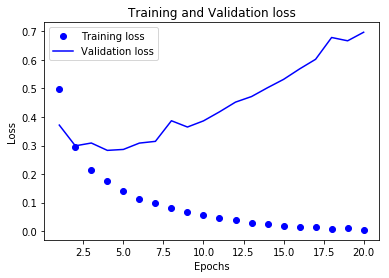

In [5]:
history_dict=history.history
history_dict.keys()

import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

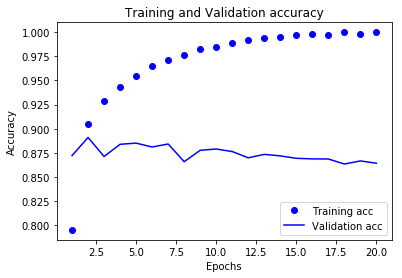

In [6]:
# clear figure
plt.clf()
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
model.evaluate(x_test,y_test)

#model.predict(x_test)

Epoch 1/4
25000/25000 [==============================] - 3s 127us/step - loss: 0.4485 - acc: 0.8255
Epoch 2/4
25000/25000 [==============================] - 3s 111us/step - loss: 0.2600 - acc: 0.9106
Epoch 3/4
25000/25000 [==============================] - 3s 108us/step - loss: 0.1998 - acc: 0.9293
Epoch 4/4
25000/25000 [==============================] - 3s 120us/step


[0.2935594177675247, 0.88436]

In [8]:
# 1 hiddern layer
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=4,batch_size=512)
model.evaluate(x_test,y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 125us/step - loss: 0.4477 - acc: 0.8325
Epoch 2/4
25000/25000 [==============================] - 3s 114us/step - loss: 0.2797 - acc: 0.9077
Epoch 3/4
25000/25000 [==============================] - 3s 127us/step - loss: 0.2214 - acc: 0.9244
Epoch 4/4
25000/25000 [==============================] - 3s 128us/step


[0.2789420987510681, 0.8888]

In [13]:
# 3 hidden layers
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=4,batch_size=512)
model.evaluate(x_test,y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 134us/step - loss: 0.4744 - acc: 0.8109
Epoch 2/4
25000/25000 [==============================] - 3s 114us/step - loss: 0.2638 - acc: 0.9104
Epoch 3/4
25000/25000 [==============================] - 3s 109us/step - loss: 0.1969 - acc: 0.9300
Epoch 4/4
25000/25000 [==============================] - 3s 132us/step


[0.3153176353359222, 0.87884]

In [17]:
# 8 hidden units
model=models.Sequential()
model.add(layers.Dense(8,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile('rmsprop','binary_crossentropy',['accuracy'])
model.fit(x_train,y_train,epochs=4,batch_size=512)
model.evaluate(x_test,y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 118us/step - loss: 0.4801 - acc: 0.8161
Epoch 2/4
25000/25000 [==============================] - 3s 104us/step - loss: 0.2914 - acc: 0.9054
Epoch 3/4
25000/25000 [==============================] - 3s 100us/step - loss: 0.2228 - acc: 0.9242
Epoch 4/4
25000/25000 [==============================] - 3s 108us/step


[0.2814912584590912, 0.88752]

In [20]:
# use mse loss function
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile('rmsprop','mse',['accuracy'])
model.fit(x_train,y_train,epochs=4,batch_size=512)
model.evaluate(x_test,y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 124us/step - loss: 0.1485 - acc: 0.8227
Epoch 2/4
25000/25000 [==============================] - 3s 111us/step - loss: 0.0761 - acc: 0.9125
Epoch 3/4
25000/25000 [==============================] - 3s 107us/step - loss: 0.0580 - acc: 0.9301
Epoch 4/4
25000/25000 [==============================] - 3s 122us/step


[0.08605020601987838, 0.88484]

In [22]:
model=models.Sequential()
model.add(layers.Dense(16,activation='tanh',input_shape=(10000,)))
model.add(layers.Dense(16,activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile('rmsprop','binary_crossentropy',['accuracy'])
model.fit(x_train,y_train,epochs=4,batch_size=512)
model.evaluate(x_test,y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 141us/step - loss: 0.4251 - acc: 0.8284
Epoch 2/4
25000/25000 [==============================] - 3s 112us/step - loss: 0.2378 - acc: 0.9138
Epoch 3/4
25000/25000 [==============================] - 3s 108us/step - loss: 0.1793 - acc: 0.9338
Epoch 4/4
25000/25000 [==============================] - 3s 135us/step


[0.3398666948223114, 0.871]